# Estimating Areas Via Monte Carlo

* draw a rectangle around your arbitrary shape with area = Area_rec
* simulate n points from a uniform distribution for the x coordinate: min = right bound of the rectangle and max = left bound of the rectangle for the y coordinate: min = lower bound of the rectangle and max = upper bound of the rectangle
* check the number of points simulated which fall in the arbitrary shape (count)
* Area of arbitrary shape = count / n * Area_rec

In [2]:
def AOC(number_of_sim, ST):

    count = 0
    n = number_of_sim
    x = np.random.uniform(ST.iloc[:, 0].min(), ST.iloc[:, 0].max(), size=n)
    y = np.random.uniform(ST.iloc[:, 1].min(), ST.iloc[:, 1].max(), size=n)

    ST = ST.sort_values(by="Distance de la rive droite (m)").copy()
    X, Y = ST.iloc[:, 0].values, ST.iloc[:, 1].values

    for i in range(len(x)):

        ix = np.argmin(np.abs(x[i] - X))


        if x[i] > X[ix]: 
            x1, x2= X[ix], X[ix+1]
            y1, y2 = Y[ix], Y[ix +1]
        else: 
            x2, x1 = X[ix], X[ix-1]
            y2, y1 = Y[ix], Y[ix -1]
            

        slope = (y2 - y1)/(x2 - x1)
        y_poly = y1 + slope*(x[i] - x1)

        if y[i] < y_poly:
            count += 1 

    Area_box = (ST.iloc[:, 0].max() - ST.iloc[:, 0].min())*(ST.iloc[:, 1].max() - ST.iloc[:, 1].min())
    return count/n * Area_box


In [6]:
import numpy as np 
import pandas as pd

abr = pd.DataFrame({"Distance de la rive droite (m)":[0, 20, 30 , 35, 40, 40], "y":[0, 100, 100, 100, 100, 0]})

AOC(100, abr)

2760.0

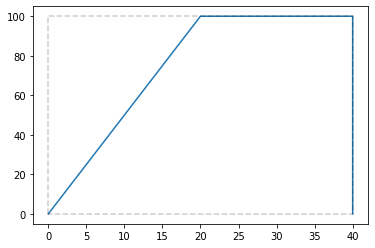

In [14]:
import matplotlib.pyplot as plt
plt.plot([0, 20, 30 , 35, 40, 40],[0, 100, 100, 100, 100, 0])
plt.plot([0,0,  40, 40, 0], [0, 100, 100, 0, 0], ls="--", c="k", alpha=0.2)